In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand
import pickle as pk




(128, 128)


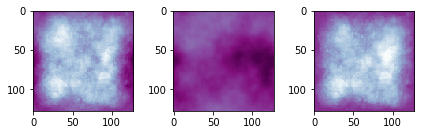

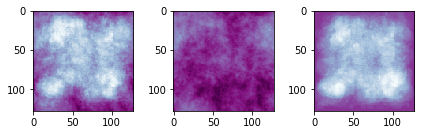

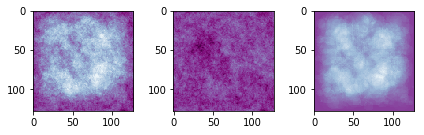

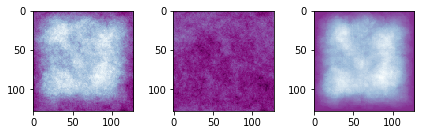

In [3]:
def fftIndgen(n):
    a = range(0, n//2+1)
    b = range(1, n//2)[::-1]
    b = [-i for i in b]
    return list(a) + b

def gaussian_random_field(Pk = lambda k : k**-3.0, size = 100):
    def Pk2(kx, ky):
        if kx == 0 and ky == 0:
            return 0.0
        return np.sqrt(Pk(np.sqrt(kx**2 + ky**2)))
    noise = np.fft.fft2(np.random.normal(size = (size, size)))
    
    amplitude = np.zeros((size,size))
    print()
    for i, kx in enumerate(fftIndgen(size)):
        for j, ky in enumerate(fftIndgen(size)):            
            amplitude[i, j] = Pk2(kx, ky)
    return np.fft.ifft2(noise * amplitude)

def circle(A,radius,p=.1):
    cir = np.zeros((radius*2+1,radius*2+1))
    cir[radius,radius]=A
    for i in range(radius*2):
        for j in range(radius*2):
            if ((j-radius)!=0) or ((i-radius)!=0):
                if ((i-radius)**2+(j-radius)**2)**.5<=radius:
                    cir[i,j]=A/((i-radius)**2+(j-radius)**2)**p
    return cir

def rand_blobs(A,radius,size):
    bframe = np.zeros((size,size))
    cx = rand.randint(radius,size-radius)
    cy = rand.randint(radius,size-radius)
    bframe[cx-radius:cx+radius+1,cy-radius:cy+radius+1]=circle(A,radius)
    return bframe
sout=0
sblobs=0
for alpha in [-4, -3.0, -2.0]:
    out = gaussian_random_field(Pk = lambda k: k**alpha, size=128)
    sout+=out
    blobs = [rand_blobs(a/20/alpha*-1,r,128) for a in rand.uniform(0,1,25) for r in rand.randint(1,20,25)]
    sblobs+=np.sum(blobs,axis=0)
    fig, axes=plt.subplots(1,3)
    _min, _max = np.amin(out.real+np.sum(blobs,axis=0)), np.amax(out.real+np.sum(blobs,axis=0))
    axes[0].imshow(out.real+np.sum(blobs,axis=0), cmap=plt.cm.BuPu_r, vmin = _min, vmax = _max)
    axes[1].imshow(out.real, cmap=plt.cm.BuPu_r, vmin = _min, vmax = _max)
    axes[2].imshow(np.sum(blobs,axis=0), cmap=plt.cm.BuPu_r, vmin = _min, vmax = _max)
    plt.tight_layout()
fig, axes=plt.subplots(1,3)
print(np.shape(sblobs))
_min, _max = np.amin(sout.real+sblobs), np.amax(sout.real+sblobs)
axes[0].imshow(sout.real+sblobs, cmap=plt.cm.BuPu_r, vmin = _min, vmax = _max)
axes[1].imshow(sout.real, cmap=plt.cm.BuPu_r, vmin = _min, vmax = _max)
axes[2].imshow(sblobs, cmap=plt.cm.BuPu_r, vmin = _min, vmax = _max)
plt.tight_layout()

In [191]:
training_set[0][0]

array([[0.30041026, 0.25176559, 0.29963692, ..., 0.23890397, 0.30923131,
        0.41264435],
       [0.52296488, 0.45787472, 0.34502509, ..., 0.36919728, 0.18648127,
        0.40441124],
       [0.52023726, 0.49176   , 0.3805317 , ..., 0.21937295, 0.20659667,
        0.32138368],
       ...,
       [0.26261331, 0.36281762, 0.17702358, ..., 0.69458125, 0.4742944 ,
        0.276011  ],
       [0.27057563, 0.21034489, 0.19889263, ..., 0.58081939, 0.5380478 ,
        0.55601176],
       [0.19281517, 0.07258395, 0.27895753, ..., 0.35735347, 0.36266018,
        0.45262491]])

In [5]:

training_set=[]
for i in range(100):
    sout=0
    sblobs=0
    for alpha in [ -3.0]:
        out = gaussian_random_field(Pk = lambda k: k**alpha, size=128)
        sout+=out
        blobs = [rand_blobs(a/20/alpha*-1,r,128) for a in rand.uniform(0,1,25) for r in rand.randint(1,20,25)]
        sblobs+=np.sum(blobs,axis=0)
    training_set.append((sout.real,sblobs,sout.real+sblobs))


In [6]:
pk.dump(training_set,open('Fake_sims_for_separation_test.pk','wb'))

In [7]:
a=pk.load(open('Fake_sims_for_separation_test.pk','rb'))

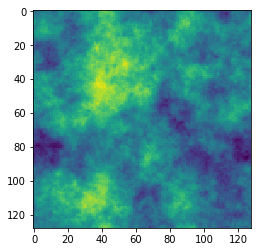

In [11]:
plt.imshow(a[1][0])

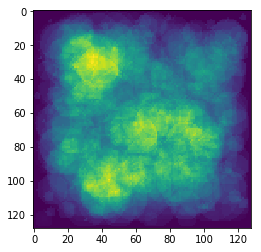

In [12]:
plt.imshow(training_set[1][1])

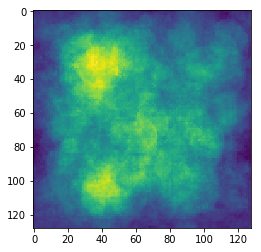

In [13]:
plt.imshow(training_set[1][2])

In [14]:
np.min(training_set[1][2])

-0.057741514767921824